In [1]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [2]:
import pandas as pd

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Impostazioni grafiche
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Target Distribution

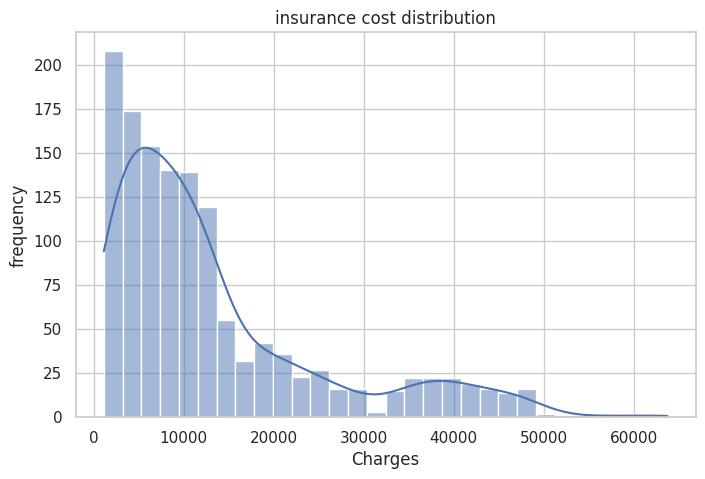

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True)
plt.title('insurance cost distribution')
plt.xlabel('Charges')
plt.ylabel('frequency')
plt.show()

Pattern clarification through features relationship

Text(0.5, 1.0, 'insurance cost for smoker/not smoker')

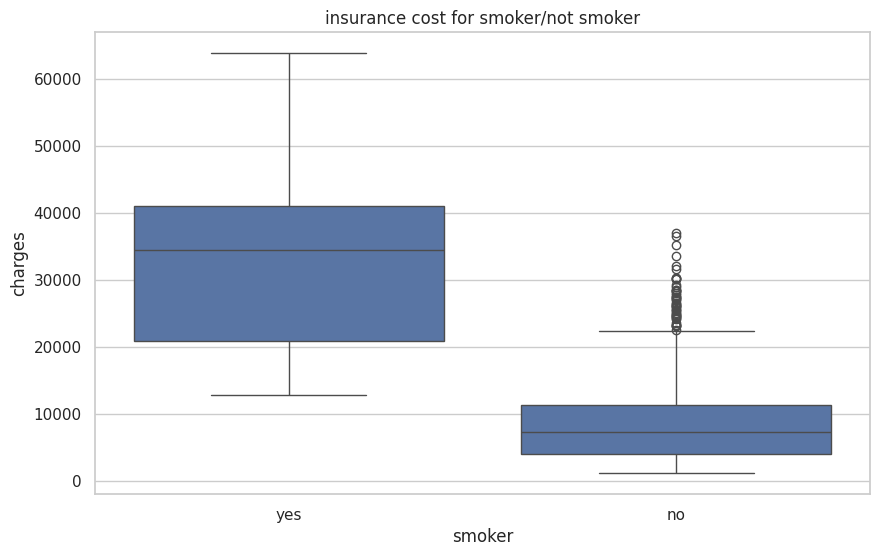

In [6]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('insurance cost for smoker/not smoker')

Text(0.5, 1.0, 'insurance cost for sex')

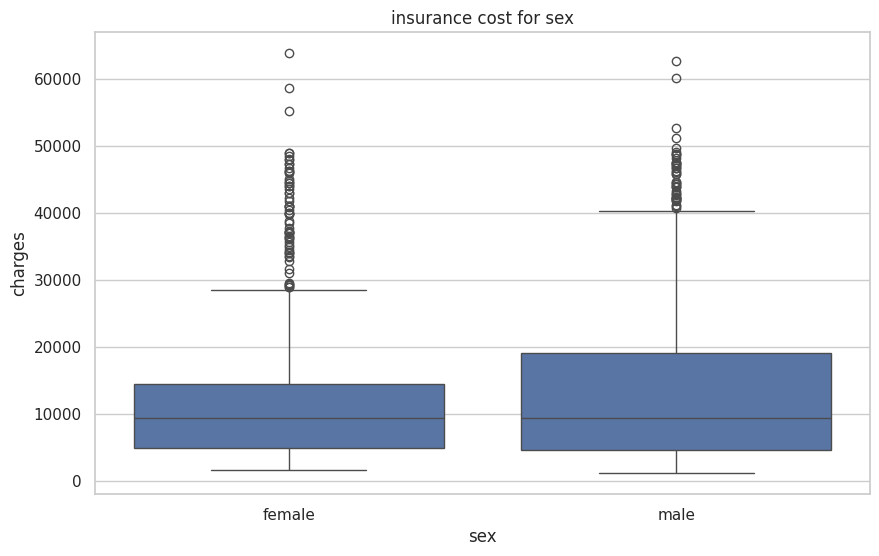

In [7]:
sns.boxplot(x='sex', y='charges', data=df)
plt.title('insurance cost for sex')

Text(0.5, 1.0, 'insurance cost for region')

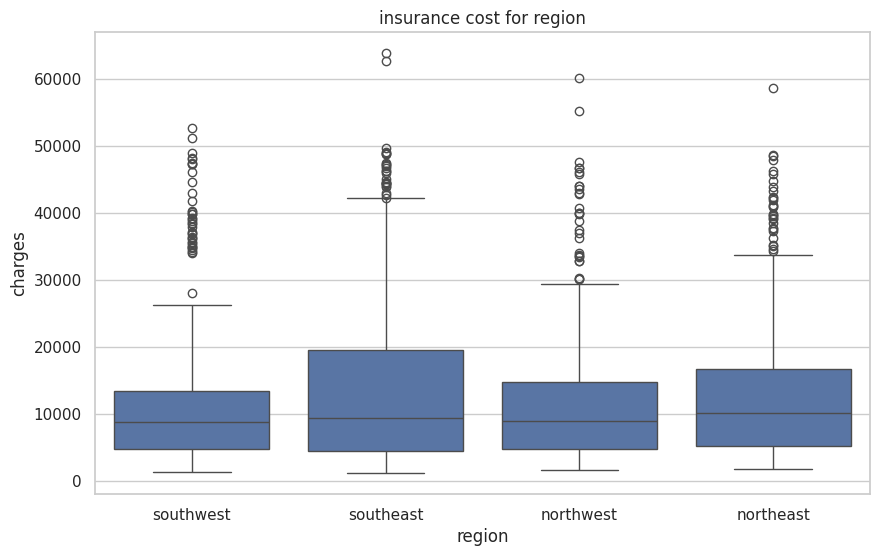

In [8]:
sns.boxplot(x='region', y='charges', data=df)
plt.title('insurance cost for region')

Correlation check

Text(0.5, 1.0, 'correlation matrix')

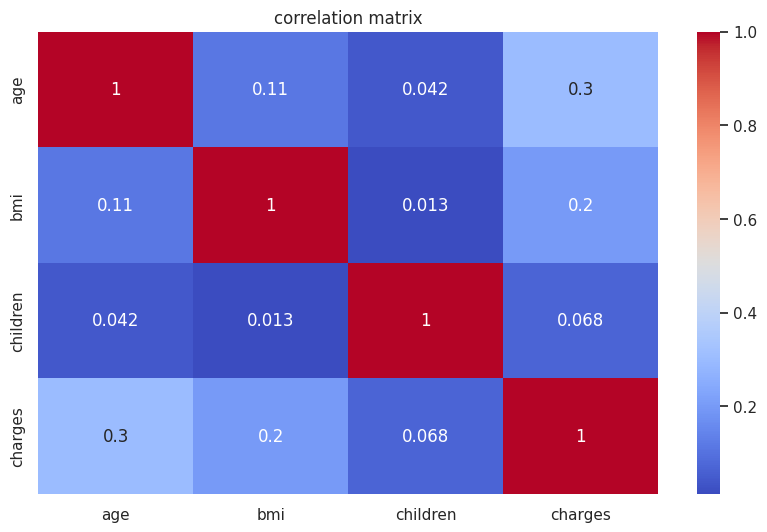

In [9]:
numeric_cols = ['age', 'bmi', 'children', 'charges']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('correlation matrix')

One-hot encoding

In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


Scaling numerical features

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['age', 'bmi', 'children']
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

In [12]:
df_encoded.dtypes

,0
age,float64
bmi,float64
children,float64
charges,float64
sex_male,bool
smoker_yes,bool
region_northwest,bool
region_southeast,bool
region_southwest,bool


In [13]:
df_encoded.isnull().sum()

,0
age,0
bmi,0
children,0
charges,0
sex_male,0
smoker_yes,0
region_northwest,0
region_southeast,0
region_southwest,0


In [14]:
print(df.shape)
print(df_encoded.shape)

(1338, 7)
(1338, 9)


In [15]:
df_encoded.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [16]:
df_encoded[['age', 'bmi', 'children']].describe()

,age,bmi,children
count,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.805565e-16,-2.124194e-16,-5.576008e-17
std,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-2.412011e+00,-9.086137e-01
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02
75%,8.396738e-01,6.611572e-01,7.510793e-01
max,1.765289e+00,3.685522e+00,3.240619e+00


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['children'].plot(kind='hist', bins=20, title='children')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='age', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='bmi', y='children', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['children'].plot(kind='line', figsize=(8, 4), title='children')
plt.gca().spines[['top', 'right']].set_visible(False)

In [17]:
df_encoded['charges'].describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


In [18]:
df_encoded[['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']] = df_encoded[['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']].astype(int)

In [19]:
df_encoded.dtypes

,0
age,float64
bmi,float64
children,float64
charges,float64
sex_male,int64
smoker_yes,int64
region_northwest,int64
region_southeast,int64
region_southwest,int64


In [20]:
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,0,1,0,0,1
1,-1.509965,0.509621,-0.078767,1725.55230,1,0,0,1,0
2,-0.797954,0.383307,1.580926,4449.46200,1,0,0,1,0
3,-0.441948,-1.305531,-0.908614,21984.47061,1,0,1,0,0
4,-0.513149,-0.292556,-0.908614,3866.85520,1,0,1,0,0


In [24]:
df_encoded.to_csv('insurance_cleaned.csv', index=False)